In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap
import sarchl
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
dcu_data = pd.read_csv('./DCUL1_1010.csv',index_col=0)
print(dcu_data.columns)
dcu_data.columns = ['Benchmark','P3 w/o L1','P3 w/ L1']
dcu_data['P3 w/ L1'] = dcu_data['P3 w/ L1']/dcu_data['P3 w/o L1']
dcu_data['P3 w/o L1'] = dcu_data['P3 w/o L1']/dcu_data['P3 w/o L1']


dcu_data = dcu_data.melt(id_vars=['Benchmark'],value_vars=['P3 w/o L1','P3 w/ L1'])
dcu_data.columns=['Benchmark','GPU','Normalized\nExecution Time']

Index(['Benchmark', 'P2DCU', 'P2DCUL1'], dtype='object')


In [8]:
dcu_data

Benchmark        GPU  Normalized\nExecution Time
0       ATAX  P3 w/o L1                    1.000000
1       BICG  P3 w/o L1                    1.000000
2         BS  P3 w/o L1                    1.000000
3        FIR  P3 w/o L1                    1.000000
4        FLW  P3 w/o L1                    1.000000
5        FWT  P3 w/o L1                    1.000000
6         KM  P3 w/o L1                    1.000000
7         MT  P3 w/o L1                    1.000000
8         PR  P3 w/o L1                    1.000000
9       ReLU  P3 w/o L1                    1.000000
10      SPMV  P3 w/o L1                    1.000000
11      ATAX   P3 w/ L1                    0.993265
12      BICG   P3 w/ L1                    1.000131
13        BS   P3 w/ L1                    1.005283
14       FIR   P3 w/ L1                    0.869260
15       FLW   P3 w/ L1                    0.750075
16       FWT   P3 w/ L1                    1.015963
17        KM   P3 w/ L1                    0.945600
18        MT   P3 w/ L1                    1.015349
19        PR   P3 w/ L1                    1.000171
20      ReLU   P3 w/ L1                    1.000015
21      SPMV   P3 w/ L1                    1.005929

In [9]:
palt = sarchl.sequential_palette(2)
palt

['#02090a', '#3bb1d1']

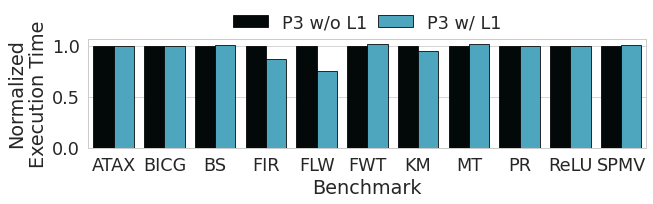

In [10]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=dcu_data, 
            x='Benchmark', hue='GPU', y='Normalized\nExecution Time', 
            palette=palt, ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.15), loc=10, ncol=2)
# ax.set_ylim(0.9, 1.70)
# ax.set_yticks([1.0, 1.3, 1.6])
plt.savefig('DCUL1.pdf', bbox_inches='tight')
plt.show()
